1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. 
Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
Есть ли в данных пропущенные значения?
https://stepik.org/media/attachments/lesson/384464/london.csv
   - Да, во многих
   - **Нет**
   - Да, но совсем немного

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np

url = 'https://stepik.org/media/attachments/lesson/384464/london.csv'
df = pd.read_csv(url)
# подсчет пропущенных значений
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [24]:
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


2. Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

     по оси x – дата (timestamp)    
     по оси y – число поездок (cnt)    

    - В выходные поездок точно меньше, чем в будние дни

    - **Очень сложно что-то понять, нужно преобразовать данные, чтобы увидеть тренды**

    - Случались только аномальные скачки вверх, вниз ничего не падало

In [25]:
#sns.lineplot(x = df.timestamp, y = df.cnt)

3. Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:

**data.resample(rule='D').column_name.sum()**  
**data.resample(rule='D').agg({'column_name':'sum'})**

Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

   - Встречаются только резкие скачки вверх

   - Максимальное число аренд за день – более 1 000 000

   - Число аренд зимой и летом никак не различается

   - **Зимой число аренд меньше, чем летом**

   - Максимальное число аренд за день не превышало 8 000

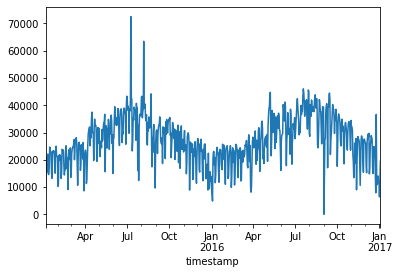

In [26]:
df[['timestamp']] = df[['timestamp']].apply(pd.to_datetime)
df = df.set_index('timestamp')
df = df.resample(rule='D').cnt.sum()
df.plot()

4. Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день 🤔.
Для этого разделим дальнейшие действия на несколько этапов:
   - сначала посчитаем скользящее среднее, чтобы сгладить ряд
   - далее – разницу между наблюдаемыми и сглаженными значениями
   - определим верхние и нижние границы 99% доверительного интервала 
   - найдем причины аномалий!
На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3.  
В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [27]:
# скользящее среднее 
tt = df.reset_index()
tt['rol'] = round(tt.rolling(window=3).mean(), 0)
tt.head()

,timestamp,cnt,rol
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16740.0
3,2015-01-07,21064,20683.0
4,2015-01-08,15601,19093.0


5. Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. 
Далее – примените функцию для подсчета стандартного отклонения. Например:
c = a - b
std = np.std(c)
В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [29]:
c = tt['cnt'] - tt['rol']
std = np.std(c)
round(std, 2)

4558.59

6. Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

    - upper_bound – верхняя граница; к средним прибавляем 2.576 * std
    - lower_bound – нижняя граница; вычитаем 2.576 * std  
Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.   

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.   

In [30]:
tt['upper_bound'] = round(tt['rol'] + (2.576 * std), 2)
tt['lower_bound'] = round(tt['rol'] - (2.576 * std), 2)
tt.tail(5)

,timestamp,cnt,rol,upper_bound,lower_bound
726,2016-12-30,11566,12682.0,24424.92,939.08
727,2016-12-31,11424,12347.0,24089.92,604.08
728,2017-01-01,6421,9804.0,21546.92,-1938.92
729,2017-01-02,11823,9889.0,21631.92,-1853.92
730,2017-01-03,19436,12560.0,24302.92,817.08


7. И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [33]:
tt.query('cnt > upper_bound')

,timestamp,cnt,rol,upper_bound,lower_bound
186,2015-07-09,72504,50705.0,62447.92,38962.08
214,2015-08-06,63468,46627.0,58369.92,34884.08
609,2016-09-04,27512,14259.0,26001.92,2516.08
721,2016-12-25,36653,19651.0,31393.92,7908.08


8. Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 
 - Погода
 - Ошибка при сборе данных
 - **Забастовки в метро**
 - Ветер
 - Выборы

9. Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?

  - Выборы
  - Погода
  - Забастовки
  - Пробки
  - Ветер
  - **Ошибка при сборе данных**

In [34]:
tt.query('cnt < lower_bound')

,timestamp,cnt,rol,upper_bound,lower_bound
130,2015-05-14,15609,28709.0,40451.92,16966.08
189,2015-07-12,23240,36037.0,47779.92,24294.08
201,2015-07-24,16034,31014.0,42756.92,19271.08
232,2015-08-24,17400,29529.0,41271.92,17786.08
314,2015-11-14,8898,21037.0,32779.92,9294.08
607,2016-09-02,0,26086.0,37828.92,14343.08
615,2016-09-10,17080,31262.0,43004.92,19519.08
621,2016-09-16,21967,36193.0,47935.92,24450.08
678,2016-11-12,8990,20878.0,32620.92,9135.08
